## First Look

In [203]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# These are plotting parameters that will be true until the next modification
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [204]:
data = pd.read_csv('HR_Employee_Attrition.csv')

In [205]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [207]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There are several (9) columns that can be categorical:

In [208]:
data[data.columns[data.dtypes == object]].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [209]:
len(data.columns[data.dtypes == object])

9

Check for more details:

In [210]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [211]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [212]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [213]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Now let's plot some histograms to have a quick look about the data distribution:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

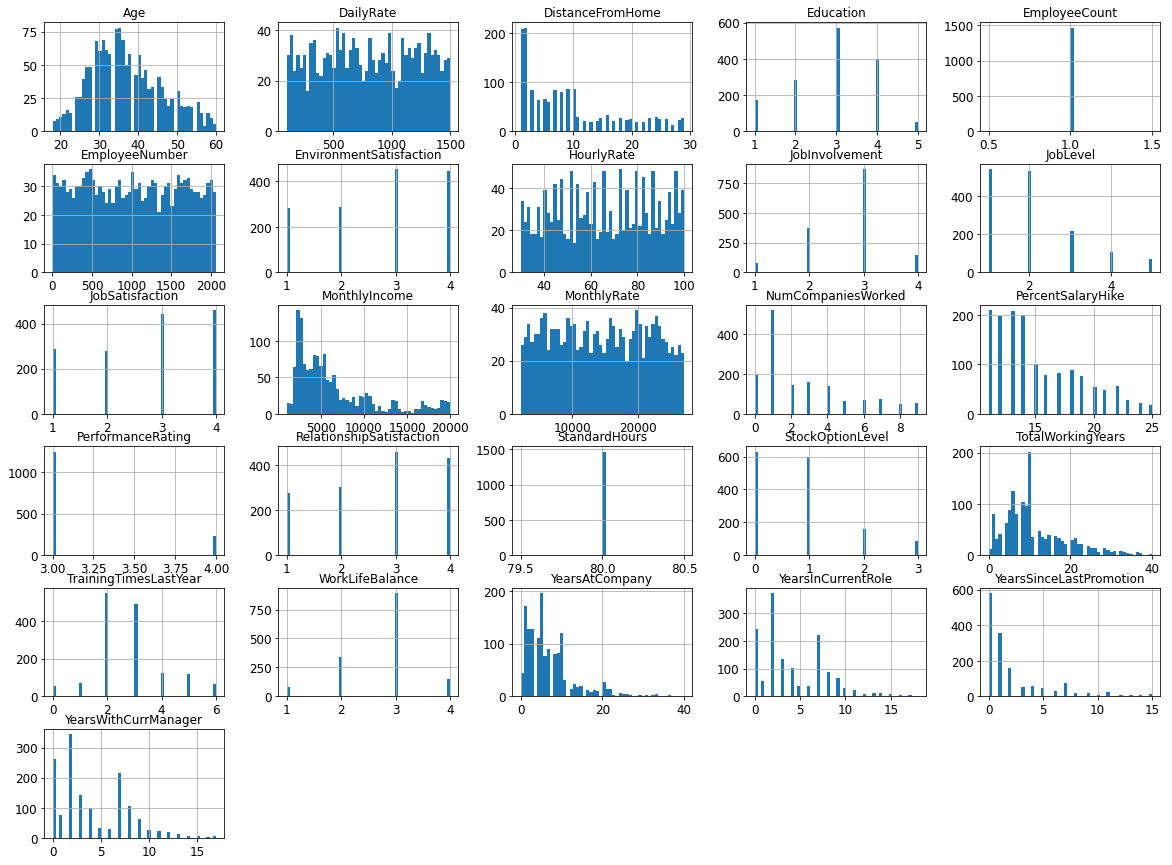

In [214]:
data.hist(bins=50, figsize=((20,15)))

While some features are evenly distributed (such as *employee number*, *daily* or *monthly rate*) other ones seem to have a well-defined bell-shaped curve. For example *age*:

<AxesSubplot:>

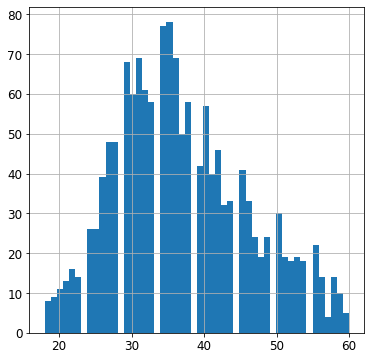

In [215]:
data['Age'].hist(bins=50, figsize=((6,6)))

In [216]:
data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

## Data split
This step must be done __before__ looking too much at the data, avoiding some further selection.

In [217]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [218]:
#checking the correct dimension
len(test_set)/len(data)

0.2

This is a good working method, but we need to ensure that the test set is representative of the entire dataset,that is: proportions in some key features need to be replicated in the test set. We then apply the __stratification method__:

In [219]:
#divide the age feature into categories
data['Age Cat'] = np.ceil(data['Age']/10)

In [220]:
#proportions
data['Age Cat'].value_counts()/len(data['Age Cat'])

4.0    0.421088
3.0    0.243537
5.0    0.219048
6.0    0.097279
2.0    0.019048
Name: Age Cat, dtype: float64

<AxesSubplot:>

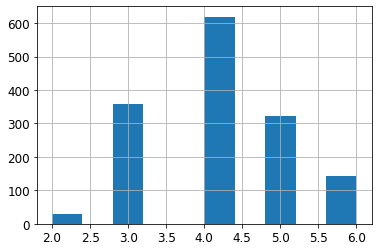

In [221]:
data['Age Cat'].hist()

In [222]:
#stratification
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [223]:
for train_index, test_index in split.split(data, data['Age Cat']):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [224]:
test_set['Age Cat'].value_counts()/len(test_set['Age Cat'])

4.0    0.421769
3.0    0.244898
5.0    0.217687
6.0    0.095238
2.0    0.020408
Name: Age Cat, dtype: float64

These proportions are very similar (almost identical) to the ones in the original data set. We then delete this new feature, used just to make the test set representative.
I chose the *Age* feature because it seems the one with the most well-defined histogram curve. I strongly believe that the stratification could be also very useful with the *monthly income feature*. Stratification is not incredibly meaningful on the overall performance, so maybe I will try this alternative later.

In [225]:
for set in train_set, test_set:
    set.drop(['Age Cat'], axis=1, inplace=True)

In [226]:
train_set.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1428,32,No,Travel_Rarely,234,Sales,1,4,Medical,1,2013,...,2,80,1,3,2,3,2,2,2,2
1213,23,Yes,Travel_Rarely,427,Sales,7,3,Life Sciences,1,1702,...,2,80,1,3,2,3,3,2,0,2
417,40,No,Travel_Rarely,1398,Sales,2,4,Life Sciences,1,558,...,4,80,0,21,2,3,20,15,1,12
981,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,3,80,1,5,0,2,4,2,3,2
1232,35,No,Travel_Rarely,1370,Research & Development,27,4,Life Sciences,1,1728,...,2,80,1,17,3,3,7,7,0,7


## Data exploration
Let's try to plot some features that may be correlated (at first impression), then verify the correlation using Pearson's matrix:

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

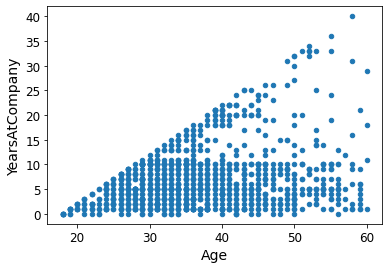

In [227]:
train_set.plot(kind='scatter', x='Age', y='YearsAtCompany')

The correlation exists upon the working-age limit (no work before age = x), but no other pattern seems to appear.
Let's try some other correlations using *seaborn*'s pairplot:

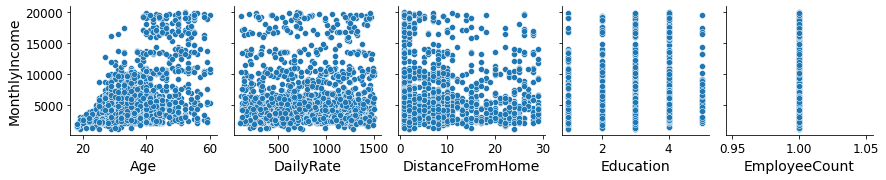

In [228]:
import seaborn as sns

sns.pairplot(data=train_set, y_vars='MonthlyIncome', x_vars=train_set.columns[train_set.dtypes != object][:5])

Pretty clear correlation between Age and Monthly Income.

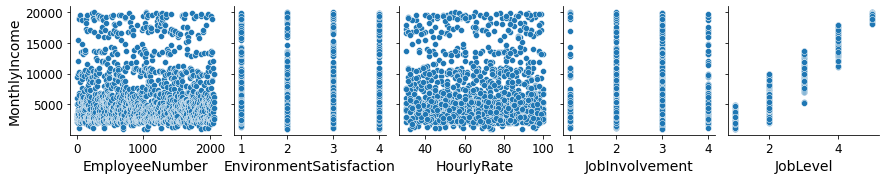

In [229]:
sns.pairplot(data=data, y_vars='MonthlyIncome', x_vars=train_set.columns[train_set.dtypes != object][5:10])

Very clear correlation between job level and monthly income (as expected).

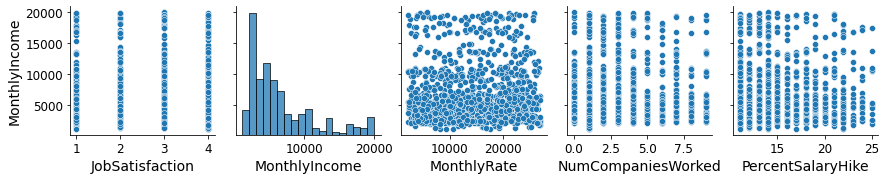

In [230]:
sns.pairplot(data=train_set, y_vars='MonthlyIncome', x_vars=train_set.columns[train_set.dtypes != object][10:15])

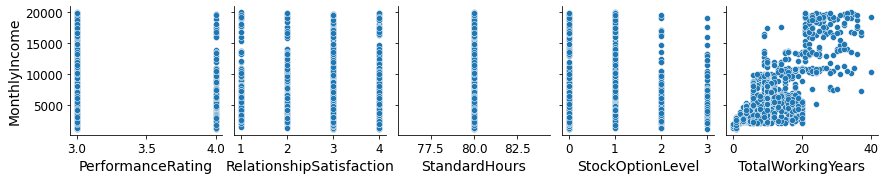

In [231]:
sns.pairplot(data=train_set, y_vars='MonthlyIncome', x_vars=train_set.columns[train_set.dtypes != object][15:20])

Nice correlation with total working years.

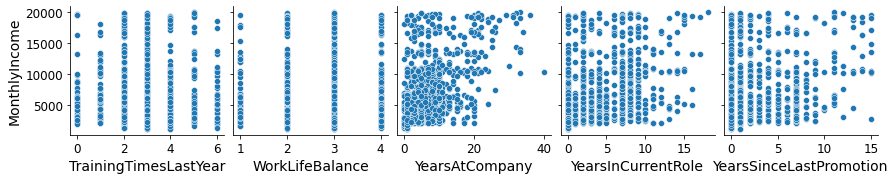

In [232]:
sns.pairplot(data=train_set, y_vars='MonthlyIncome', x_vars=train_set.columns[train_set.dtypes != object][20:-1])

Another well-defined correlation may be *monthly income* vs *total working years*. Let's plot this relation, using a color map to distinguish different *job levels*:

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

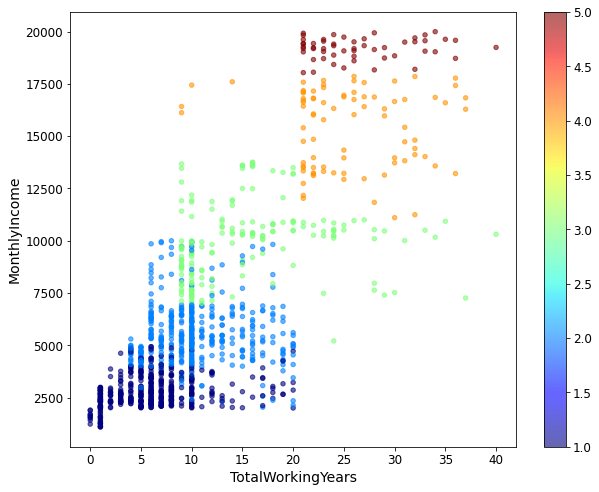

In [233]:
fig, ax = plt.subplots()
train_set.plot(kind='scatter', x='TotalWorkingYears', y='MonthlyIncome', alpha=0.6, c=train_set['JobLevel'], cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10,8), ax=ax, legend=True)

This plot clearly show a well-defined pattern: workers with longer experience and higher job levels get higher monthly incomes, as expected by intuition.

In [234]:
corr_matrix = train_set.corr()
corr_matrix

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.028428,-0.024702,0.194882,NaN,-0.007139,0.007514,0.019065,0.024852,0.504883,...,0.038586,NaN,0.039176,0.681374,0.013119,-0.019176,0.305660,0.204694,0.200815,0.200499
DailyRate,0.028428,1.000000,-0.028832,-0.004385,NaN,-0.037355,0.003834,0.041219,0.047609,0.023471,...,0.021389,NaN,0.063975,0.033641,0.008419,-0.022532,-0.020852,0.015070,-0.049009,-0.014241
DistanceFromHome,-0.024702,-0.028832,1.000000,0.039628,NaN,0.021274,-0.031162,0.003990,-0.009211,0.005774,...,0.022242,NaN,0.032099,-0.004101,-0.011594,-0.012844,0.010505,0.000665,-0.002177,0.010806
Education,0.194882,-0.004385,0.039628,1.000000,NaN,0.063270,0.001429,-0.003298,0.048110,0.089390,...,-0.015444,NaN,0.011445,0.136974,-0.015639,0.009059,0.057757,0.054164,0.019548,0.072030
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.007139,-0.037355,0.021274,0.063270,NaN,1.000000,0.041273,0.032430,-0.006975,-0.021613,...,-0.092915,NaN,0.056703,-0.008518,0.035690,0.028330,-0.001371,-0.008211,-0.012824,0.008998
EnvironmentSatisfaction,0.007514,0.003834,-0.031162,0.001429,NaN,0.041273,1.000000,-0.054527,-0.007671,0.009494,...,-0.022944,NaN,-0.003477,-0.006598,-0.025615,0.054699,0.015514,0.051017,0.025613,0.024923
HourlyRate,0.019065,0.041219,0.003990,-0.003298,NaN,0.032430,-0.054527,1.000000,0.039962,-0.026523,...,0.000048,NaN,0.055716,-0.000415,0.001385,-0.010869,-0.013604,-0.020331,-0.046034,-0.007053
JobInvolvement,0.024852,0.047609,-0.009211,0.048110,NaN,-0.006975,-0.007671,0.039962,1.000000,-0.014538,...,0.051628,NaN,0.040887,-0.002618,-0.005979,-0.019648,-0.020889,0.031234,-0.005599,0.039437
JobLevel,0.504883,0.023471,0.005774,0.089390,NaN,-0.021613,0.009494,-0.026523,-0.014538,1.000000,...,0.030397,NaN,0.028423,0.777880,-0.004732,0.046745,0.518409,0.372999,0.324404,0.356523


In [235]:
corr_matrix['MonthlyIncome'].sort_values()

PercentSalaryHike          -0.041570
PerformanceRating          -0.027360
JobInvolvement             -0.020367
EmployeeNumber             -0.016692
DistanceFromHome           -0.013795
JobSatisfaction            -0.013432
HourlyRate                 -0.009330
TrainingTimesLastYear      -0.000335
EnvironmentSatisfaction    -0.000111
StockOptionLevel            0.016008
DailyRate                   0.026415
RelationshipSatisfaction    0.035942
WorkLifeBalance             0.038437
MonthlyRate                 0.047550
Education                   0.069268
NumCompaniesWorked          0.134032
YearsSinceLastPromotion     0.313169
YearsWithCurrManager        0.329717
YearsInCurrentRole          0.345563
Age                         0.493249
YearsAtCompany              0.495523
TotalWorkingYears           0.771577
JobLevel                    0.949982
MonthlyIncome               1.000000
EmployeeCount                    NaN
StandardHours                    NaN
Name: MonthlyIncome, dtype: float64

The correlation between the *monthly income* and *job level* is indeed very high.
Then we try to combine these 2 features, creating a new *monthly income per job level* feature.

In [236]:
train_set['MonthlyIncomePerJobLevel'] = train_set['MonthlyIncome']/train_set['JobLevel']

In [237]:
train_set.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomePerJobLevel
1428,32,No,Travel_Rarely,234,Sales,1,4,Medical,1,2013,...,80,1,3,2,3,2,2,2,2,2269.0
1213,23,Yes,Travel_Rarely,427,Sales,7,3,Life Sciences,1,1702,...,80,1,3,2,3,3,2,0,2,2275.0
417,40,No,Travel_Rarely,1398,Sales,2,4,Life Sciences,1,558,...,80,0,21,2,3,20,15,1,12,3608.2
981,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,80,1,5,0,2,4,2,3,2,2307.0
1232,35,No,Travel_Rarely,1370,Research & Development,27,4,Life Sciences,1,1728,...,80,1,17,3,3,7,7,0,7,3441.5


In [238]:
train_set.corr()['MonthlyIncomePerJobLevel']

Age                         0.265142
DailyRate                   0.030928
DistanceFromHome           -0.036243
Education                   0.019501
EmployeeCount                    NaN
EmployeeNumber              0.021154
EnvironmentSatisfaction    -0.030155
HourlyRate                  0.040798
JobInvolvement             -0.019766
JobLevel                    0.417514
JobSatisfaction            -0.019223
MonthlyIncome               0.646494
MonthlyRate                 0.023095
NumCompaniesWorked          0.123359
PercentSalaryHike          -0.027659
PerformanceRating          -0.041548
RelationshipSatisfaction    0.016890
StandardHours                    NaN
StockOptionLevel           -0.012615
TotalWorkingYears           0.415614
TrainingTimesLastYear      -0.010420
WorkLifeBalance             0.004997
YearsAtCompany              0.247747
YearsInCurrentRole          0.196431
YearsSinceLastPromotion     0.158711
YearsWithCurrManager        0.177737
MonthlyIncomePerJobLevel    1.000000
N

However, this strategy does not seem to find any interesting correlations, so we drop it:

In [239]:
train_set.drop(['MonthlyIncomePerJobLevel'], axis=1, inplace=True)

In [240]:
train_set.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1428,32,No,Travel_Rarely,234,Sales,1,4,Medical,1,2013,...,2,80,1,3,2,3,2,2,2,2
1213,23,Yes,Travel_Rarely,427,Sales,7,3,Life Sciences,1,1702,...,2,80,1,3,2,3,3,2,0,2
417,40,No,Travel_Rarely,1398,Sales,2,4,Life Sciences,1,558,...,4,80,0,21,2,3,20,15,1,12
981,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,3,80,1,5,0,2,4,2,3,2
1232,35,No,Travel_Rarely,1370,Research & Development,27,4,Life Sciences,1,1728,...,2,80,1,17,3,3,7,7,0,7


Since there are not missing values, we are then ready to adjust the data to use a ML algorithm.

## Preparing the data
We start back from the *data* dataframe and divide it into 2 datasets: 1 with numerical values, 1 with categorical values.

In [241]:
X_train_labels = train_set['Attrition']
X_train_labels.head()

1428     No
1213    Yes
417      No
981     Yes
1232     No
Name: Attrition, dtype: object

In [242]:
train_set.drop(['Attrition'], axis=1, inplace=True)

__Encoding categorical attributes__

In [243]:
X_train = train_set

In [244]:
X_train_cat = X_train[X_train.columns[X_train.dtypes == object]].head()
X_train_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1428,Travel_Rarely,Sales,Medical,Male,Sales Representative,Married,Y,No
1213,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Divorced,Y,Yes
417,Travel_Rarely,Sales,Life Sciences,Female,Manager,Married,Y,No
981,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,Y,Yes
1232,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,No


In [245]:
X_train_num = X_train[X_train.columns[X_train.dtypes != object]].head()
X_train_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1428,32,234,1,4,1,2013,2,68,2,1,...,2,80,1,3,2,3,2,2,2,2
1213,23,427,7,3,1,1702,3,99,3,1,...,2,80,1,3,2,3,3,2,0,2
417,40,1398,2,4,1,558,3,79,3,5,...,4,80,0,21,2,3,20,15,1,12
981,35,662,18,4,1,1380,4,67,3,2,...,3,80,1,5,0,2,4,2,3,2
1232,35,1370,27,4,1,1728,4,49,3,2,...,2,80,1,17,3,3,7,7,0,7


In [246]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)
X_train_cat_encoded

array([[1., 1., 2., 1., 3., 1., 0., 0.],
       [1., 1., 0., 1., 3., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 2., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1., 0., 0.]])

Unfortunately, these numbers do not have a precise meaning, so it's better to use *1-hot encoding*:

In [247]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
X_train_cat_encoded = one_hot_encoder.fit_transform(X_train_cat)
X_train_cat_encoded #numpy array

array([[0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
        1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 1.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
        1., 0.]])

In [248]:
one_hot_encoder.categories_

[array(['Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Research & Development', 'Sales'], dtype=object),
 array(['Life Sciences', 'Marketing', 'Medical'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Manager', 'Manufacturing Director', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married'], dtype=object),
 array(['Y'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

__Scaling__
Even though this is an artificial dataset, it could be useful to scale the data, so that extremely high/low values don't affect too much the training phase.
We then create a __pipeline__ with the following requests:
- standard scaling;
- 1-hot encoding

Note that, in this case, the *imputer* (filling missing values) and the *attributes adder* do not need to be used.

In [249]:
X_train_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1428,32,234,1,4,1,2013,2,68,2,1,...,2,80,1,3,2,3,2,2,2,2
1213,23,427,7,3,1,1702,3,99,3,1,...,2,80,1,3,2,3,3,2,0,2
417,40,1398,2,4,1,558,3,79,3,5,...,4,80,0,21,2,3,20,15,1,12
981,35,662,18,4,1,1380,4,67,3,2,...,3,80,1,5,0,2,4,2,3,2
1232,35,1370,27,4,1,1728,4,49,3,2,...,2,80,1,17,3,3,7,7,0,7


In [250]:
X_train_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1428,Travel_Rarely,Sales,Medical,Male,Sales Representative,Married,Y,No
1213,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Divorced,Y,Yes
417,Travel_Rarely,Sales,Life Sciences,Female,Manager,Married,Y,No
981,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,Y,Yes
1232,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,No


In [251]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

data_num_tr = num_pipeline.fit_transform(X_train_num)
data_num_tr[:5]

array([[-0.17789202, -1.21320517, -0.99800598,  0.5       ,  0.        ,
         1.07150669, -1.60356745, -0.2680536 , -2.        , -0.81649658,
        -1.58113883, -0.77498784,  0.15271648, -0.75      , -0.97991187,
        -0.5       , -0.75      ,  0.        ,  0.5       , -0.88860423,
         0.20412415,  0.5       , -0.78607627, -0.70820053,  0.68599434,
        -0.75      ],
       [-1.77892017, -0.81240305, -0.39920239, -2.        ,  0.        ,
         0.45071947, -0.26726124,  1.62050584,  0.5       , -0.81649658,
         1.58113883, -0.7739653 ,  1.12983142,  0.5       ,  1.6583124 ,
         2.        , -0.75      ,  0.        ,  0.5       , -0.88860423,
         0.20412415,  0.5       , -0.63490776, -0.70820053, -1.02899151,
        -0.75      ],
       [ 1.24524412,  1.20406771, -0.89820538,  0.5       ,  0.        ,
        -1.83281938, -0.26726124,  0.4020804 ,  0.5       ,  1.90515869,
         0.        ,  1.91294554, -0.53770998, -0.75      , -0.97991187,
       

In [252]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat.columns)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(X_train)

In [253]:
data_prepared[:5]

array([[-5.43780584e-01, -1.42318839e+00, -1.01265291e+00,
         1.04323543e+00,  0.00000000e+00,  1.65130574e+00,
        -6.53946141e-01,  1.28859558e-01, -1.04309954e+00,
        -9.59461743e-01, -6.55877776e-01, -9.07322054e-01,
         5.39378182e-01, -1.08000928e+00, -3.42153577e-01,
        -4.30678385e-01, -6.65767557e-01,  0.00000000e+00,
         2.36133887e-01, -1.06600235e+00, -6.04683867e-01,
         3.28053756e-01, -8.25882553e-01, -6.22858040e-01,
        -5.47414366e-02, -5.91749332e-01,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+0

In [254]:
data_prepared_df = pd.DataFrame(
    data_prepared,
    columns=list(X_train_num.columns)+list(map(str, list(range(55-len(list(X_train_num.columns)))))),
    index=X_train.index
)
#convert int features into string to prevent from error messages

data_prepared_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,19,20,21,22,23,24,25,26,27,28
1428,-0.543781,-1.423188,-1.012653,1.043235,0.0,1.651306,-0.653946,0.128860,-1.043100,-0.959462,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1213,-1.527269,-0.942807,-0.275342,0.066448,0.0,1.133557,0.265959,1.652110,0.375033,-0.959462,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
417,0.330431,1.474031,-0.889768,1.043235,0.0,-0.770961,0.265959,0.669368,0.375033,2.671518,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
981,-0.215951,-0.357888,1.076394,1.043235,0.0,0.597495,1.185864,0.079722,0.375033,-0.051717,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1232,-0.215951,1.404339,2.182361,1.043235,0.0,1.176841,1.185864,-0.804745,0.375033,-0.051717,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [255]:
data_prepared_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,19,20,21,22,23,24,25,26,27,28
count,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1176.0,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000
mean,1.805056e-16,-4.607048e-17,-4.682573e-17,6.948335e-17,0.0,4.229421e-17,1.208406e-17,3.323117e-17,-2.356392e-16,5.437827e-17,...,0.055272,0.201531,0.221939,0.051871,0.221939,0.460884,0.317177,1.0,0.706633,0.293367
std,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,0.0,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,...,0.228608,0.401314,0.415727,0.221860,0.415727,0.498680,0.465575,0.0,0.455499,0.455499
min,-2.073651e+00,-1.749250e+00,-1.012653e+00,-1.887127e+00,0.0,-1.698248e+00,-1.573851e+00,-1.738351e+00,-2.461233e+00,-9.594617e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,-7.623335e-01,-8.339128e-01,-8.897678e-01,-9.103392e-01,0.0,-8.812534e-01,-6.539461e-01,-8.538826e-01,-1.043100e+00,-9.594617e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,-1.066747e-01,-1.813641e-02,-2.753421e-01,6.644812e-02,0.0,-4.326184e-03,2.659590e-01,-1.855177e-02,3.750335e-01,-5.171676e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,6.582607e-01,8.996898e-01,5.848538e-01,1.043235e+00,0.0,9.009024e-01,1.185864e+00,8.659162e-01,3.750335e-01,8.560282e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,2.515961e+00,1.725422e+00,2.428131e+00,2.020023e+00,0.0,1.737875e+00,1.185864e+00,1.701247e+00,1.793166e+00,2.671518e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


## Model selection
To select a model, we first need to identify the optimal one based on the overall performance on the training set.
We now introduce *K-fold Cross Validation*, which consists in randomly splitting the training set into 10 (or any number we associate to *cv*) disjoint subsets (folds), training the model on 9 of them and testing it on the remaining one. Then the algorithm repeats this process 10 times, leaving out each fold for validation and using the other ones for training.

In [256]:
X_train_labels.head()

1428     No
1213    Yes
417      No
981     Yes
1232     No
Name: Attrition, dtype: object

In [257]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

tree_clf.fit(data_prepared_df, X_train_labels)

DecisionTreeClassifier()

In [258]:
tree_clf.score(data_prepared_df, X_train_labels)

1.0

Definitely overfitting.

In [259]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(data_prepared_df, X_train_labels)

log_clf.score(data_prepared_df, X_train_labels)

0.8988095238095238

Does not seem to overfit, but the performance is not great.

In [260]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(data_prepared_df, X_train_labels)

svm_clf.score(data_prepared_df, X_train_labels)

0.9183673469387755

Let's try to perform cross validation:

In [261]:
#function to display the scores:
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

    print('\nSCORES')
    i = 0
    for s in scores:
        print(f'#{i}\t', s)
        i += 1

In [262]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(DecisionTreeClassifier(), data_prepared_df, X_train_labels, cv=5)

In [263]:
display_scores(tree_scores)

Mean: 0.7984385142445006
Standard deviation: 0.01921955002460229

SCORES
#0	 0.8347457627118644
#1	 0.8
#2	 0.7914893617021277
#3	 0.7829787234042553
#4	 0.7829787234042553


In [264]:
log_scores = cross_val_score(LogisticRegression(), data_prepared_df, X_train_labels, cv=5)
display_scores(log_scores)

Mean: 0.8698954201226108
Standard deviation: 0.01309718794509848

SCORES
#0	 0.8728813559322034
#1	 0.8893617021276595
#2	 0.8553191489361702
#3	 0.8765957446808511
#4	 0.8553191489361702


In [265]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = cross_val_score(RandomForestClassifier(), data_prepared_df, X_train_labels, cv=5)
display_scores(rf_scores)

Mean: 0.861388388027407
Standard deviation: 0.007026855936114767

SCORES
#0	 0.8686440677966102
#1	 0.8638297872340426
#2	 0.8680851063829788
#3	 0.851063829787234
#4	 0.8553191489361702


In [266]:
svm_scores = cross_val_score(SVC(), data_prepared_df, X_train_labels, cv=5)
display_scores(svm_scores)

Mean: 0.8665019834114677
Standard deviation: 0.004155503554976749

SCORES
#0	 0.8601694915254238
#1	 0.8680851063829788
#2	 0.8723404255319149
#3	 0.8638297872340426
#4	 0.8680851063829788


A simple logistic regression looks quite promising. However, its standard deviation does not look great. Let's try SVM instead.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['rbf', 'linear', 'poly'], 'C':np.linspace(0.01,5,10),
     'gamma':np.linspace(0.1,5,10)},
  ]

svm_clf = SVC(random_state=42)
# train across 5 folds
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, verbose=20)

grid_search.fit(data_prepared_df, X_train_labels)

In [275]:
print('Best estimator:\t\t', grid_search.best_params_['kernel'])
print('Best score:\t\t\t', grid_search.best_score_)
print('Best parameters:\t', grid_search.best_params_)

Best estimator:		 linear
Best score:			 0.8741435268662098
Best parameters:	 {'C': 0.5644444444444445, 'gamma': 0.1, 'kernel': 'linear'}


Well, the performance did not improve so much. Let's try out another model.

In [276]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_clf, param_grid, cv=5)
grid_search.fit(data_prepared_df, X_train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}])

In [279]:
print('Best score:\t\t\t', grid_search.best_score_)
print('Best parameters:\t', grid_search.best_params_)

Best score:			 0.8630760908763072
Best parameters:	 {'max_features': 8, 'n_estimators': 30}


In [284]:
#Randomized search:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'gamma': randint(low=0.01, high=200),
        'C': randint(low=0.01, high=100),
    }

svm_clf = SVC(random_state=42, kernel='linear')
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, random_state=42)
rnd_search.fit(data_prepared_df, X_train_labels)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000181007719F0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018100772170>},
                   random_state=42)

In [285]:
print('Best score:\t\t\t', rnd_search.best_score_)
print('Best parameters:\t', rnd_search.best_params_)

Best score:			 0.8724413992066354
Best parameters:	 {'C': 14, 'gamma': 106}


Let's plot the confusion matrix since these performances are not too good. We now try to understand where the algorithm gets wrong:

In [292]:
from sklearn.metrics import confusion_matrix
def prepare_confusion_matrix(model, X, y):
    plt.figure(figsize=(10,6))
    pred = model.predict(X)
    cm = confusion_matrix(y, pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

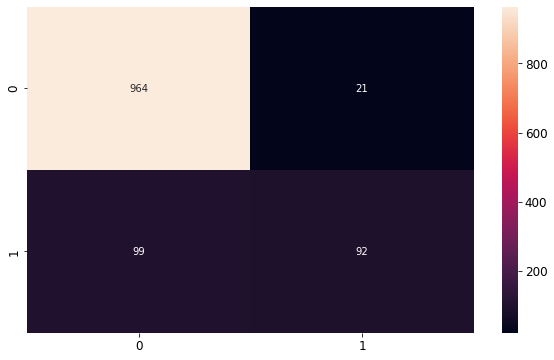

In [294]:
prepare_confusion_matrix(rnd_search.best_estimator_, data_prepared_df, X_train_labels)